In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


In [2]:

def adjacentMatrix(x,y,H,W):
#     conpute the mask of adjacent matrix for pixel(x,y) 
    mask = np.zeros((H,W),dtype=np.bool_)
    a = max(0,x-1)
    b = min(H,x+1)
    c = max(0,y-1)
    d = min(W,y+1)
    mask[a:b+1,c:d+1] = True
    mask[x,y] = False
    return mask

def initial(path, threshold):
#     loading image and initialize fuzzy connectivity map, temporary queue Q
    img = imageio.v2.imread('./'+path+'.img')
    H,W = img.shape
    FC = np.zeros((H,W),dtype=img.dtype)
    Smask = img >= threshold
    FC[Smask] = img[Smask]
    index = np.argwhere(Smask == True)
    Q = np.zeros((H,W), dtype=np.bool_)
    for i in range(index.shape[0]):
        x,y = index[i]
        qmask = adjacentMatrix(x,y,H,W)
        Q[qmask] = True
    return img,FC,Q

def Qsearch(img,FC,Q):
#     update queue Q until it's empty
    H,W = img.shape
    while Q.sum() != 0:
        index = np.argwhere(Q == True)
        for idx in index:
            x,y = idx        
            Q[x,y] = False
            qmask = adjacentMatrix(x,y,H,W)
            Fp = img[x,y]
            Fcq = FC[qmask]
            fmax = 0

            for fcq in Fcq:
                temp = min(fcq,Fp)
                fmax = max(fmax,temp)

            if fmax > FC[x,y]:
                FC[x,y] = fmax
                Q[qmask] = True
    return FC

def plotResult(path,img,FC):
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(FC)
    plt.title('Fuzzy connectivity map')
    plt.subplot(122)

    plt.imshow(img)
    plt.title('Image')
    plt.savefig('./output'+path+'.png')

def fuzzyConnect(path, threshold):
    print('Loading ' + path+ '...')
    img,FC,Q = initial(path,threshold)
    print('Computing fuzzy connectivity...')
    FC = Qsearch(img,FC,Q)
    print('Plotting.')
    plotResult(path,img,FC)
    return img, FC



Loading Image1...
Computing fuzzy connectivity...
Plotting.


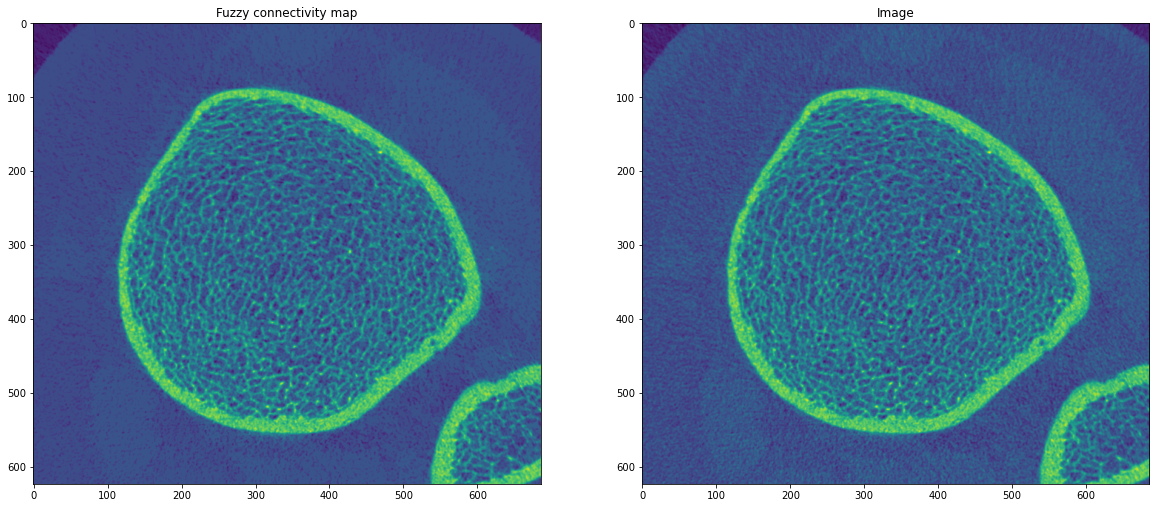

In [3]:
imgpath = 'Image'
threshold = [1250,1250,1200,1250]
img1,FC1 = fuzzyConnect(imgpath+str(1),threshold[0])
# img2,FC2 = fuzzyConnect(imgpath+str(2),threshold[1])
# img3,FC3 = fuzzyConnect(imgpath+str(3),threshold[2])
# img4,FC4 = fuzzyConnect(imgpath+str(4),threshold[3])

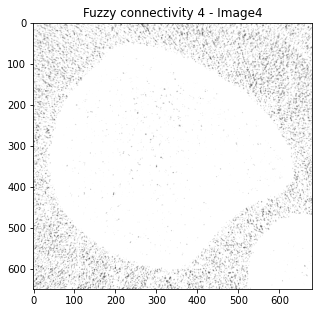

In [337]:
plt.figure(figsize=(5,5))
plt.imshow(FC4-img4, cmap='gray')
plt.title('Fuzzy connectivity 4 - Image4')
plt.savefig('./dif4.png')

In [7]:
path = 'Image1'
img = imageio.v2.imread('./'+path+'.img')